# Importing Libraries

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [134]:
import classes.file_loader as file_loader
import classes.linear_time_series as linear_time_series

# Data Preprocessing

## Loading Files

In [135]:
file_path = "" # File is in the parent file
file_name = "Index.xlsx"

FileLoader = file_loader.FileLoader(file_path, file_name)

In [136]:
classic_sheet_name, precarity_sheet_name = "Classique","Précarité"

classic_raw_df, preacarity_raw_df = FileLoader.load_file(classic_sheet_name, precarity_sheet_name)

c:\Users\PC FIXE HUGO\Documents\Time_series_Prediction\classes\file_loader.py:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  classic_raw_df.fillna(method = "ffill", inplace=True)
c:\Users\PC FIXE HUGO\Documents\Time_series_Prediction\classes\file_loader.py:38: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  precarity_raw_df.fillna(method = "ffill", inplace=True)


In [137]:
classic_raw_df

,Date,SPOT
0,2023-04-24,7.212716
1,2023-05-01,7.321166
2,2023-05-08,7.360211
3,2023-05-15,7.380000
4,2023-05-22,7.400000
...,...,...
85,2024-12-16,7.810000
86,2024-12-23,7.970000
87,2024-12-30,7.970000
88,2025-01-06,7.970000


In [138]:
preacarity_raw_df

,Date,SPOT
0,2023-04-24,7.296783
1,2023-05-01,7.460184
2,2023-05-08,7.465385
3,2023-05-15,7.465385
4,2023-05-22,7.473191
...,...,...
85,2024-12-16,9.720000
86,2024-12-23,9.820000
87,2024-12-30,9.820000
88,2025-01-06,10.030000


## Augmented dataframes

In [139]:
augmented_classic_df = FileLoader.interpolate_dataframe(classic_raw_df)
augmented_classic_df.to_csv("augmented_classic_df.csv", index=False)
augmented_classic_df

,Date,SPOT
0,2023-04-24,7.212716
1,2023-04-25,7.191417
2,2023-04-26,7.249039
3,2023-04-27,7.288207
4,2023-04-28,7.331824
...,...,...
446,2025-01-07,7.987879
447,2025-01-08,7.997139
448,2025-01-09,7.950192
449,2025-01-10,7.931522


In [140]:
augmented_precarity_df = FileLoader.interpolate_dataframe(preacarity_raw_df)
augmented_precarity_df.to_csv("augmented_precarity_df.csv", index=False)
augmented_precarity_df

,Date,SPOT
0,2023-04-24,7.296783
1,2023-04-25,7.297955
2,2023-04-26,7.229770
3,2023-04-27,7.460652
4,2023-04-28,7.333221
...,...,...
446,2025-01-07,9.802435
447,2025-01-08,9.752349
448,2025-01-09,10.111007
449,2025-01-10,10.557730


## Plotting the augmented dataframes 

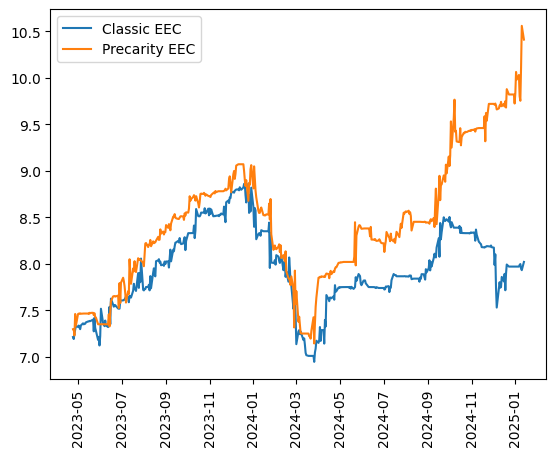

In [141]:
plt.figure()

plt.plot(augmented_classic_df["Date"], augmented_classic_df["SPOT"], label = "Classic EEC")
plt.plot(augmented_precarity_df["Date"], augmented_precarity_df["SPOT"], label = "Precarity EEC")
plt.legend()
plt.xticks(rotation = 90)

plt.show()

# Data forecasting

## Classic EEC

### Tests

#### Stationnarity

From the Graph we can clearly see that the data is non stationnary. We will first differentiate the time series and check weither it has 

In [142]:
classic_df = augmented_classic_df.copy()
classic_df["Delta"] = classic_df["SPOT"] - classic_df["SPOT"].shift(1)
classic_df.dropna(inplace = True)
classic_df

,Date,SPOT,Delta
1,2023-04-25,7.191417,-0.021299
2,2023-04-26,7.249039,0.057622
3,2023-04-27,7.288207,0.039168
4,2023-04-28,7.331824,0.043617
5,2023-05-01,7.321166,-0.010658
...,...,...,...
446,2025-01-07,7.987879,0.017879
447,2025-01-08,7.997139,0.009261
448,2025-01-09,7.950192,-0.046948
449,2025-01-10,7.931522,-0.018669


In [143]:
result = adfuller(classic_df["Delta"], regression='c', autolag='AIC')

adf_stat, pvalue, usedlag, nobs, crit_values, icbest = result

print(f"p-value: {pvalue}")

if pvalue < 0.05:
    print("Result: reject unit root -> series is stationary (at 5% level).")
else:
    print("Result: fail to reject unit root -> series is non-stationary.")

p-value: 1.560487104607799e-13
Result: reject unit root -> series is stationary (at 5% level).


In [144]:
precarity_df = augmented_precarity_df.copy()
precarity_df["Delta"] = precarity_df["SPOT"] - precarity_df["SPOT"].shift(1)
precarity_df.dropna(inplace = True)
precarity_df

,Date,SPOT,Delta
1,2023-04-25,7.297955,0.001173
2,2023-04-26,7.229770,-0.068185
3,2023-04-27,7.460652,0.230882
4,2023-04-28,7.333221,-0.127431
5,2023-05-01,7.460184,0.126963
...,...,...,...
446,2025-01-07,9.802435,-0.227565
447,2025-01-08,9.752349,-0.050086
448,2025-01-09,10.111007,0.358658
449,2025-01-10,10.557730,0.446723


In [145]:
result = adfuller(precarity_df["Delta"], regression='c', autolag='AIC')

adf_stat, pvalue, usedlag, nobs, crit_values, icbest = result

print(f"p-value: {pvalue}")

if pvalue < 0.05:
    print("Result: reject unit root -> series is stationary (at 5% level).")
else:
    print("Result: fail to reject unit root -> series is non-stationary.")

p-value: 0.0
Result: reject unit root -> series is stationary (at 5% level).


We separate trainning and test data to test our models predictions on out of sample data.

### ARIMA

We create an ARMA model (in reality ARIMA as the series wwas already differentiated), using a class built on our own.

In [146]:
# Initiate the ARMA class
LineaTimeSeriesModel = linear_time_series.LineaTimeSeriesModel(classic_df["Delta"])

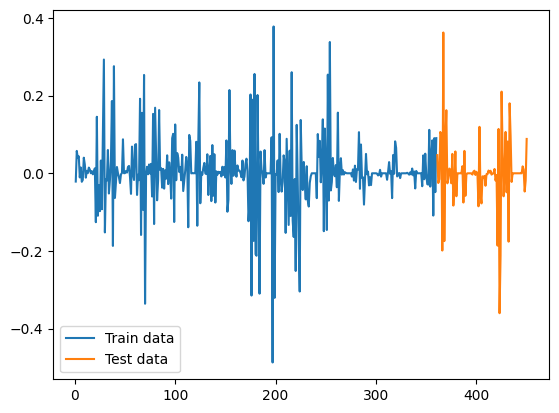

In [147]:
LineaTimeSeriesModel.train_test_split()

plt.figure()
plt.plot(LineaTimeSeriesModel.train_dependent, label="Train data")
plt.plot(LineaTimeSeriesModel.test_dependent, label="Test data")
plt.legend()
plt.show()

In [148]:
# Selecting the last relevant lags
ma_max_order = LineaTimeSeriesModel.get_ma_max_order()
ar_max_order = LineaTimeSeriesModel.get_ar_max_order()
print(f"Max MA order: {ma_max_order}, Max AR order: {ar_max_order}")

Max MA order: 2, Max AR order: 2


Now we select the best model using BIC and AIC critertions :

In [149]:
selected_models = LineaTimeSeriesModel.select_model(ma_max_order, ar_max_order)

c:\Users\PC FIXE HUGO\Documents\Time_series_Prediction\venv_time_series_prediction\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\PC FIXE HUGO\Documents\Time_series_Prediction\venv_time_series_prediction\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\PC FIXE HUGO\Documents\Time_series_Prediction\venv_time_series_prediction\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self

In [150]:
selected_models["aic"]

{'order': (2, 0, 2),
 'model': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x18c87165640>,
 'aic': np.float64(-795.853878853668)}

In [151]:
selected_models["bic"]

{'order': (0, 0, 2),
 'model': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x18c87181a00>,
 'bic': np.float64(-776.5254604509016)}

### LSTM

### GRU